# Simulationsmodell E-Post
**Inhaltlich** besteht das finale Simulationsmodell wie bereits vorbesprochen aus folgenden Teilen:
- Einer PV Anlage (mit einer Größe in kWp)
- Einer Flotte E-Fahrzeugen ("Etrucks"), die einem wöchentlichen Fahrplan (Schedule) folgen
- Einer Batterie (mit einer Speicherkapazität in kWh)
- Einem Dispatcher, der verfügbare PV Energie zuerst zur Fahrzeug-Beladung verwendet (wenn Fahrzeuge laut Schedule vor Ort und noch nicht den gewünschten Ladestand erreicht haben), dann in der Batterie speichert (wenn möglich) und erst dann auf Netzstrom zurückgreift, um die nötigen Ladestand der Flotte herzustellen. Wenn keine PV verfügbar ist, wird zuerst die Batterie zur Fahrzeugladung verwendet.

**Programmiertechnisch** soll das finale Simulationsmodell aus zwei Teilen bestehen, die Stück für Stück aufgebaut werden:
1. Einem Python Script namens "Model.py", in dem alle Modellbestandteile definiert sind, die zur Simulation benötigt werden: Eine Klassen-Definition für die Batterie, den Etruck und ggf. der PV Anlage. 
1. Zweitens diesem Jupyter Notebook, das als "Model Explorer" dienen soll. Das Notebook soll die MOdellbestandteile importieren und die Simulation durchführen und dazu die nötige Dispatcher Logik implementieren. Dazu muss das Notebook und das Modell.py Skript im selben Ordner liegen. 


Ein Gerüst für das Model.py liegt vo. Das Gerüst beschreibt die Funktionen und Parameter, die für die Simulation notwendig sein werden. Sie können den Code dort selbst einfügen, oder ihre Lösung aus der zweiten Übung hier entsprechend einfügen und ggf. abändern und ergänzen. 

Das Jupyter Notebook hier ist eine Schritt-für Schritt Anleitung, um die Simulation aufzubauen. Es empfiehlt sich diese Schritte nachzuvollziehen und zu überprüfen, dass Ihr eigenes Modell dasselbe Verhalten aufweist. Dazu ist es einfacher, wenn sie für die Variablen und Methoden dieselben Namen verwenden, wie hier und im Modell.py vorgeschlagen.



- Lesen sie zuerst das "PV_1kWp.csv" file wie in der Übung als Numpy Array ein
- skalieren Sie es auf 1074 kWp
- Erzeugen Sie damit folgenden formattierten Output als print: 
```
PV Installed:          1074 kWp
PV Annual Yield:    1115185 kWh/a
PV Spec. Yield:      1038.3 kWh/kWp
```

In [1]:
import numpy as np

def csv2array(path, pv_kWp):
    dat = np.genfromtxt(path, delimiter=",")
    dat = dat*(pv_kWp*0.001)
    print("\n PV Installed:        ", pv_kWp, " kWp\n",
          "PV Annual Yield: ", round(dat.sum()) ," kWh/a\n",
          "PV Spec. Yield:    ", round(dat.sum()/pv_kWp, 1) ," kWh/kWp")
    return(dat)
           

# two parameters
path = "D:\Maria\data\PV_1kWp.csv"
pv_kWp = 1074

# run 
dat = csv2array(path, pv_kWp)


 PV Installed:         1074  kWp
 PV Annual Yield:  1115185  kWh/a
 PV Spec. Yield:     1038.3  kWh/kWp


Next, lets import the Model.py and test its functionality by initializing an workday Etruck and test the schedule by looping through all possible days and hours and printing day, hour and truck.status 
it should look something like this 
``
0 0 offsite
0 1 offsite
0 2 onsite
0 3 onsite
0 4 onsite
0 5 onsite
0 6 offsite
0 7 offsite
0 8 offsite
0 9 offsite
0 10 offsite
0 11 offsite
0 12 offsite
0 13 offsite
0 14 offsite
0 15 offsite
0 16 offsite
0 17 offsite
0 18 offsite
0 19 offsite
0 20 offsite
0 21 offsite
0 22 offsite
0 23 offsite
1 0 offsite
...
6 20 onsite
6 21 onsite
6 22 onsite
6 23 onsite``

In [4]:
import pandas as pd

df = pd.DataFrame({"PV" : dat.tolist(),
                   "datetime" : np.arange('2021-01-01', '2022-01-01', dtype='datetime64[h]')})

df["week"] =  df["datetime"].dt.strftime("%U")
df["day_of_week"] =  df["datetime"].dt.strftime("%w")
df["hour_of_day"] =  df["datetime"].dt.strftime("%H")
df["hours"] = range(df.shape[0])
df

,PV,datetime,week,day_of_week,hour_of_day
0,0.0,2021-01-01 00:00:00,00,5,00
1,0.0,2021-01-01 01:00:00,00,5,01
2,0.0,2021-01-01 02:00:00,00,5,02
3,0.0,2021-01-01 03:00:00,00,5,03
4,0.0,2021-01-01 04:00:00,00,5,04
...,...,...,...,...,...
8755,0.0,2021-12-31 19:00:00,52,5,19
8756,0.0,2021-12-31 20:00:00,52,5,20
8757,0.0,2021-12-31 21:00:00,52,5,21
8758,0.0,2021-12-31 22:00:00,52,5,22


In [8]:
import Model as m 
truck = m.Etruck()

out = []
for i in range(df.shape[0]):
    hour = int(df["hour_of_day"][i])
    day = int(df["day_of_week"][i])
    statu = truck.status(hour_of_day=hour, day_of_week=day)
    out.append(f'{day} {hour} {statu}')

out[120:150]

# Note the output: list, could be printed as you did

['3 0 offsite',
 '3 1 offsite',
 '3 2 offsite',
 '3 3 onsite',
 '3 4 onsite',
 '3 5 onsite',
 '3 6 offsite',
 '3 7 offsite',
 '3 8 offsite',
 '3 9 offsite',
 '3 10 offsite',
 '3 11 offsite',
 '3 12 offsite',
 '3 13 offsite',
 '3 14 offsite',
 '3 15 offsite',
 '3 16 offsite',
 '3 17 offsite',
 '3 18 offsite',
 '3 19 offsite',
 '3 20 offsite',
 '3 21 offsite',
 '3 22 offsite',
 '3 23 offsite',
 '4 0 offsite',
 '4 1 offsite',
 '4 2 offsite',
 '4 3 onsite',
 '4 4 onsite',
 '4 5 onsite']

If that looks good, you should also check the "worknight" schedule. Can you think of other test to see if the Etruck is behaving as expected? Try charging or discharging it!

Once you have validated that, let's start the actual simulation setup by defining the simulation periods like so

In [9]:
# "worknight" check:
truck.schedule = "worknight"
out = []
for i in range(df.shape[0]):
    hour = int(df["hour_of_day"][i])
    day = int(df["day_of_week"][i])
    statu = truck.status(hour, day)
    out.append(f'{day} {hour} {statu}')

out[120:150]

['3 0 offsite',
 '3 1 offsite',
 '3 2 offsite',
 '3 3 offsite',
 '3 4 offsite',
 '3 5 offsite',
 '3 6 offsite',
 '3 7 onsite',
 '3 8 onsite',
 '3 9 onsite',
 '3 10 onsite',
 '3 11 onsite',
 '3 12 onsite',
 '3 13 onsite',
 '3 14 onsite',
 '3 15 onsite',
 '3 16 onsite',
 '3 17 onsite',
 '3 18 onsite',
 '3 19 offsite',
 '3 20 offsite',
 '3 21 offsite',
 '3 22 offsite',
 '3 23 offsite',
 '4 0 offsite',
 '4 1 offsite',
 '4 2 offsite',
 '4 3 offsite',
 '4 4 offsite',
 '4 5 offsite']

In [10]:
# Checking charging and discharging methods:
# charging truck
truck.current_kWh = 50
print("Initialize current kWh: ", truck.current_kWh)
print(truck.charge(300))                               # max 100 ~ default in Model.py
print("Updated current kWh: ", truck.current_kWh)
print(truck.charge(75))
print("Updated current kWh: ", truck.current_kWh, "\n")


# discharging truck
print("Initialize current kWh: ", truck.current_kWh)
print(truck.discharge(200))                            # max 150 ~ default in Model.py
print("Updated current kWh: ", truck.current_kWh)
print(truck.discharge(25))
print("Updated current kWh: ", truck.current_kWh)

Initialize current kWh:  50
100
Updated current kWh:  150
75
Updated current kWh:  225 

Initialize current kWh:  225
150
Updated current kWh:  75
25
Updated current kWh:  50


In [11]:
# simulate a week
hours = 24*7
start_day = 200
start_hour = start_day * 24
stop_hour = start_hour + hours
print(start_hour, stop_hour)

4800 4968


With this paramters calibrated, go ahead and introduce a ``pv`` variable holding only this time-period from the initial PV. Plot the PV yield during these hours to check it indeed only shows the time-period specificed. For this, you will need to import matplotlib as introduced in the exercises. note that you can always go back to the previous cell, change the period and rerun from there

C:\Users\Jura\AppData\Local\Temp\ipykernel_6072\2878011794.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv["hourss"] = range(0, pv.shape[0], 1)


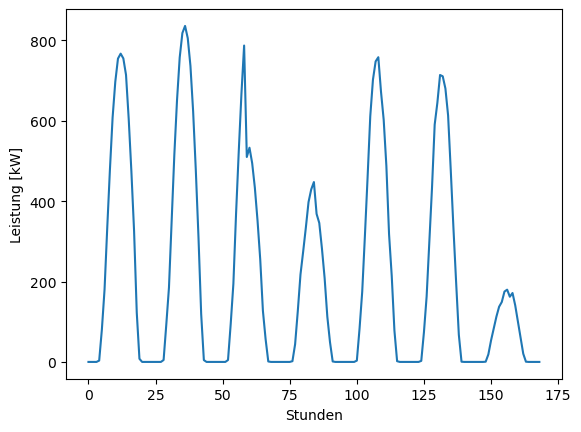

In [12]:
import matplotlib.pyplot as plt

# select timeframe
pv = df.loc[(df["hours"] >= start_hour) & (df["hours"] <= stop_hour)]
pv["hourss"] = range(0, pv.shape[0], 1)

# visualise
plt.plot(pv["hourss"], pv["PV"])
plt.ylabel("Leistung [kW]")
plt.xlabel("Stunden")
plt.show()

The next step is to prepare a Pandas dataframe that will hold the results of the simulation. Initialize a dataframe called ``energy_balance`` and add the PV yield ``pv`` as a column named "PV Yield. The advantage of Dataframes is that the hours can be formatted as datetime objects, which makes it easier to comprehend what's going on. Change the index of the dataframe to a datetime index with the appropriate time with a line like this: ``energy_balance.index = np.arange(start=0, stop=8760, dtype="datetime64[h]")[start_hour:stop_hour]``

Plot the dataframe and check that the right dates are shown on the x-Axis

C:\Users\Jura\AppData\Local\Temp\ipykernel_6072\618827753.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


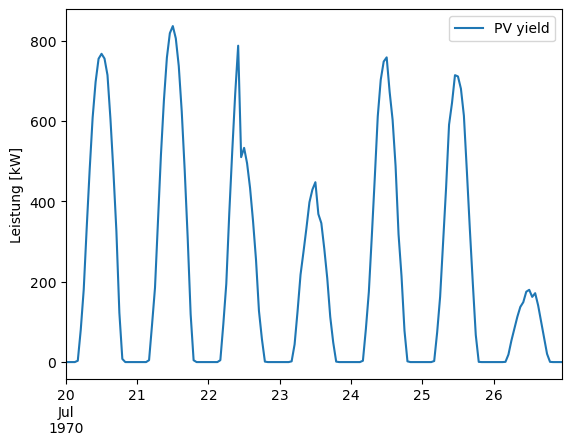

In [13]:
# bit of data wranging, setting x-axis labels
energy_balance = pd.DataFrame({"PV Yield" : df["PV"]})
energy_balance.index = np.arange(0, 8760, dtype="datetime64[h]")
eb = energy_balance[start_hour:stop_hour]
labels = np.unique(eb.index.strftime("%d"))
labels[0] = "20\nJul\n1970"

# visualise
fig, ax = plt.subplots()
ax.set_xticklabels(labels)
ax.plot(eb.index, eb["PV Yield"])
plt.xlim([eb.index[0], eb.index[-1]])
plt.ylabel("Leistung [kW]")
plt.legend(["PV yield"])
plt.show()     

Quick aside:

In [14]:
# ok now lets add some vehicles
import Model as m
truck = m.Etruck()
print(truck.capacity_kWh)
print(truck.current_kWh)

400
400


the truck looses charge, whenever its status is "offsite" and it is driving around, which in turn depends on the weekday and hour of the day.
How can you get the day of the week in the range [0-6] and the hour of the day [0-23]? 

See https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.weekday.html for infos. use the energy_balance.index, which is a datetime object, to get the neccesary information and print an example day of the week and hour of the day

In [15]:
# this requires hour of day and day of week info
print(energy_balance.index[1])
print(energy_balance.index[1].hour)
print(energy_balance.index[1].weekday()) # https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.weekday.html (monday ==0, sunday ==6)

1970-01-01 01:00:00
1
3


Now lets start our first simulation loop: do a for-loop for the number of hours and print whether the truck is offsite or onsite at this time

In [16]:
for h in range(hours):
    i = energy_balance.index[h]
    print(h, i, i.hour, i.weekday(), truck.status(i.hour, i.weekday()))

0 1970-01-01 00:00:00 0 3 offsite
1 1970-01-01 01:00:00 1 3 offsite
2 1970-01-01 02:00:00 2 3 offsite
3 1970-01-01 03:00:00 3 3 onsite
4 1970-01-01 04:00:00 4 3 onsite
5 1970-01-01 05:00:00 5 3 onsite
6 1970-01-01 06:00:00 6 3 offsite
7 1970-01-01 07:00:00 7 3 offsite
8 1970-01-01 08:00:00 8 3 offsite
9 1970-01-01 09:00:00 9 3 offsite
10 1970-01-01 10:00:00 10 3 offsite
11 1970-01-01 11:00:00 11 3 offsite
12 1970-01-01 12:00:00 12 3 offsite
13 1970-01-01 13:00:00 13 3 offsite
14 1970-01-01 14:00:00 14 3 offsite
15 1970-01-01 15:00:00 15 3 offsite
16 1970-01-01 16:00:00 16 3 offsite
17 1970-01-01 17:00:00 17 3 offsite
18 1970-01-01 18:00:00 18 3 offsite
19 1970-01-01 19:00:00 19 3 offsite
20 1970-01-01 20:00:00 20 3 offsite
21 1970-01-01 21:00:00 21 3 offsite
22 1970-01-01 22:00:00 22 3 offsite
23 1970-01-01 23:00:00 23 3 offsite
24 1970-01-02 00:00:00 0 4 offsite
25 1970-01-02 01:00:00 1 4 offsite
26 1970-01-02 02:00:00 2 4 offsite
27 1970-01-02 03:00:00 3 4 onsite
28 1970-01-02 04:00:

Next, add the first two energy flows:
- if the truck is offsite, discharge it with the energy amount required to cover the average km driven per hour
- else, charge the truck from the grid with the maximum charge

To plot and track, what is going on, you should also inclulde two numpy arrays of the same length as the simulation period: ``curent_kWh`` tracking the current charge of the Truck as the name implies, and a ``gridcharge_kWh`` tracking the charge from the grid.


In [17]:
# let's check the parameters and SOC:
batt = m.Battery()
print(truck.charge_kW)
print(truck.discharge_kW)
print(truck.max_charge)
print(batt.max_charge)
print(batt.SoC, "\n")
print("Needed:")
print("truck capacity kWh: ", truck.capacity_kWh)
print("truck current kWh: ", truck.current_kWh)
print("truck SOC: ", truck.SoC)
print("\nFurthermore:")
print("truck avg km per h: ", truck.avg_km_per_h)
print("truck consumption: ", truck.consumption)

100
150
0
0
1.0 

Needed:
truck capacity kWh:  400
truck current kWh:  400
truck SOC:  1.0

Furthermore:
truck avg km per h:  15
truck consumption:  0.85


In [18]:
# Simulation
current_kWh = np.zeros(hours)
gridcharge_kWh = np.zeros(hours)
for h in range(hours):
    i = eb.index[h]
    
    #if offsite: lower current kWh by average km driven
    if truck.status(i.hour, i.weekday()) == "offsite":
        truck.discharge(truck.avg_km_per_h * truck.consumption)
        gridcharge_kWh[h] = 0
    #if onsite: if not fully charged, charge current kWh
    else:
        if truck.current_kWh < truck.capacity_kWh:
            ch = truck.charge(truck.max_charge)
            gridcharge_kWh[h] = ch
    
    # this should then track the truck charge
    current_kWh[h] = truck.current_kWh

To plot everything in a single plot easily, add the two trackers to the ``energy_balance`` dataframe as two columns: "Fleet SOC" and "Grid" respectively, and plot the dataframe to see that everything works as expected

C:\Users\Jura\AppData\Local\Temp\ipykernel_6072\263543452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eb["Fleet SOC"] = current_kWh
C:\Users\Jura\AppData\Local\Temp\ipykernel_6072\263543452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eb["Grid"] = gridcharge_kWh
C:\Users\Jura\AppData\Local\Temp\ipykernel_6072\263543452.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


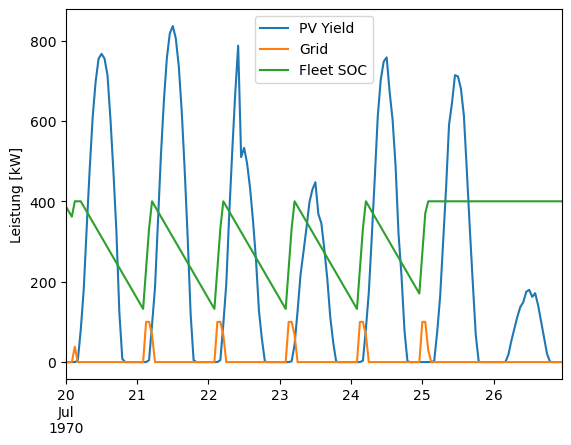

In [19]:
# add new vaiables
eb["Fleet SOC"] = current_kWh
eb["Grid"] = gridcharge_kWh

# visualize
fig, ax = plt.subplots()
ax.set_xticklabels(labels)
ax.plot(eb.index, eb["PV Yield"])
ax.plot(eb.index, eb["Grid"])
ax.plot(eb.index, eb["Fleet SOC"])
plt.xlim([eb.index[0], eb.index[-1]])
plt.ylabel("Leistung [kW]")
plt.legend(["PV Yield", "Grid", "Fleet SOC"])
plt.show()

Here you can see a couple of things:
- The Fleet is being charged by the grid
- on Weekends (25th and 26th of July), the Fleet is not discharged and does not loose charge passively either
- PV is not used

let's change that. let's copy all the code from above to run a simulation with a truck running night shifts and the charging using PV aswell, when available, plotting all resulting energy flows when done:


In [20]:
print(truck.schedule)
eb

workday


,PV Yield,Fleet SOC,Grid
1970-07-20 00:00:00,0.000000,387.25,0.00
1970-07-20 01:00:00,0.000000,374.50,0.00
1970-07-20 02:00:00,0.000000,361.75,0.00
1970-07-20 03:00:00,0.000000,400.00,38.25
1970-07-20 04:00:00,3.339469,400.00,0.00
...,...,...,...
1970-07-26 19:00:00,0.543713,400.00,0.00
1970-07-26 20:00:00,0.000000,400.00,0.00
1970-07-26 21:00:00,0.000000,400.00,0.00
1970-07-26 22:00:00,0.000000,400.00,0.00


C:\Users\Jura\AppData\Local\Temp\ipykernel_6072\3495152473.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eb["Grid"] = gridcharge_kWh
C:\Users\Jura\AppData\Local\Temp\ipykernel_6072\3495152473.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eb["Fleet SOC"] = current_kWh
C:\Users\Jura\AppData\Local\Temp\ipykernel_6072\3495152473.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

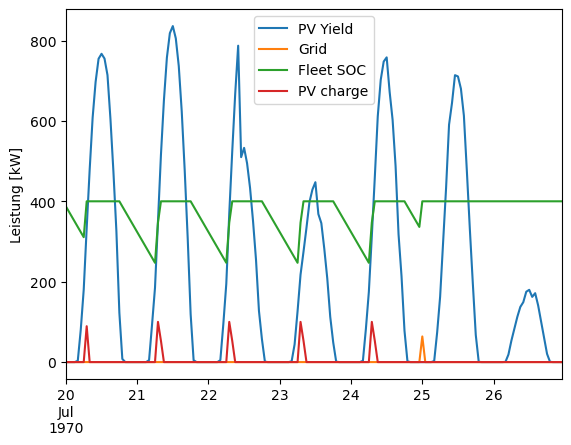

In [21]:
# intialize a truck and the tracking numpy 
truck.schedule = "worknight"
current_kWh = np.zeros(hours)
gridcharge_kWh = np.zeros(hours)
pvcharge_kWh = np.zeros(hours)

for h in range(hours):
    i = eb.index[h]
    
    #if offsite: lower current kWh by average km driven
    if truck.status(i.hour, i.weekday()) == "offsite":
        truck.discharge(truck.avg_km_per_h * truck.consumption)
        gridcharge_kWh[h] = 0
        pvcharge_kWh[h] = 0
    #if onsite: if not fully charged, charge current kWh
    else:
        if truck.current_kWh < truck.capacity_kWh:
            ch = truck.charge(truck.max_charge)
            pvcharge_kWh[h] = min(ch, eb["PV Yield"][h])
            gridcharge_kWh[h] = ch - pvcharge_kWh[h]
            
    
    # this should then track the truck charge
    current_kWh[h] = truck.current_kWh
    

# finally compile the results into dataframe columns
eb["Grid"] = gridcharge_kWh
eb["Fleet SOC"] = current_kWh
eb["PV charge"] = pvcharge_kWh

# visualize
fig, ax = plt.subplots()
ax.set_xticklabels(labels)
ax.plot(eb.index, eb["PV Yield"])
ax.plot(eb.index, eb["Grid"])
ax.plot(eb.index, eb["Fleet SOC"])
ax.plot(eb.index, eb["PV charge"])
plt.xlim([eb.index[0], eb.index[-1]])
plt.ylabel("Leistung [kW]")
plt.legend(["PV Yield", "Grid", "Fleet SOC", "PV charge"])
plt.show()

Now that's nice, but if we want to rerun the simulation, we would need to go back, change some parameters and rerun everything again, overwriting the existing results. By now, we have a first prototype of a simulation model. We should now "encapsulate" it, making it a nice, reusable package: 

Let's formalize it by creating a simulation function, that should take all simulation varibales as Input arguments and return the energy balance dataframe as a result. At the end of the cell, you should then be able to call 
```
results = simulate()
results.plot()
``` 


<AxesSubplot: >

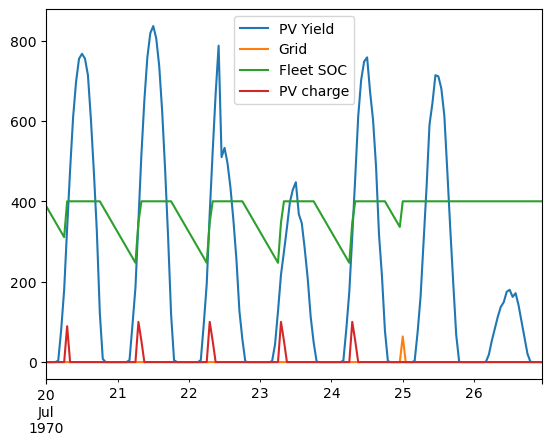

In [22]:
def simulate(
        start_day = 200, 
        hours = 24*7, 
        schedule = "worknight",
        pv_kWp = 1074
        ):
    
    truck.schedule = schedule
    start_hour = start_day * 24
    stop_hour = start_hour + hours
    pv_raw = pv_kWp*np.genfromtxt("D:\Maria\data\PV_1kWp.csv")/1000 # -> Wh > kWh/h
    pv = pv_raw[start_hour:stop_hour]
    eb = pd.DataFrame()
    eb.index = np.arange(start=0, stop=8760, dtype="datetime64[h]")[start_hour:stop_hour]

    current_kWh = np.zeros(hours)
    current_kWh[0] = truck.current_kWh
    gridcharge_kWh = np.zeros(hours)
    pvcharge_kWh = np.zeros(hours)
    
    for h in range(hours):
        i = eb.index[h]
    
        #if offsite: lower current kWh by average km driven
        if truck.status(i.hour, i.weekday()) == "offsite":
            truck.discharge(truck.avg_km_per_h * truck.consumption)
            gridcharge_kWh[h] = 0
            pvcharge_kWh[h] = 0
        #if onsite: if not fully charged, charge current kWh
        else:
            if truck.current_kWh < truck.capacity_kWh:
                ch = truck.charge(truck.max_charge)
                pvcharge_kWh[h] = min(ch, pv[h])
                gridcharge_kWh[h] = ch - pvcharge_kWh[h]
            
    
        # this should then track the truck charge
        current_kWh[h] = truck.current_kWh

    eb["PV Yield"] = pv
    eb["Grid"] = gridcharge_kWh
    eb["Fleet SOC"] = current_kWh
    eb["PV charge"] = pvcharge_kWh

    return eb

# run

ppp = simulate()
ppp.plot()

This should still look the same, but now we can run different simulations more easily: Run a simulation for a week in February and for the whole year, change the PV size and the avg truck km/h:


<AxesSubplot: >

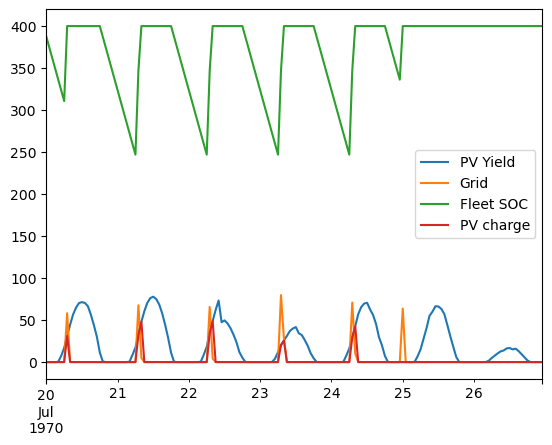

In [23]:
simulate(pv_kWp=100).plot()

<AxesSubplot: >

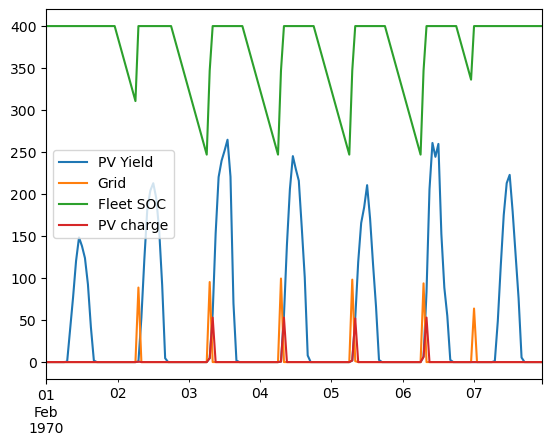

In [255]:
simulate(start_day=31, pv_kWp=1000).plot()

<AxesSubplot: >

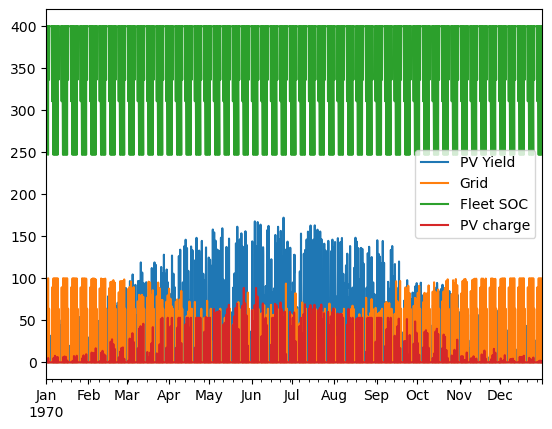

In [256]:
year = simulate(start_day=0, hours=8760, pv_kWp=200)
year.plot()

<AxesSubplot: >

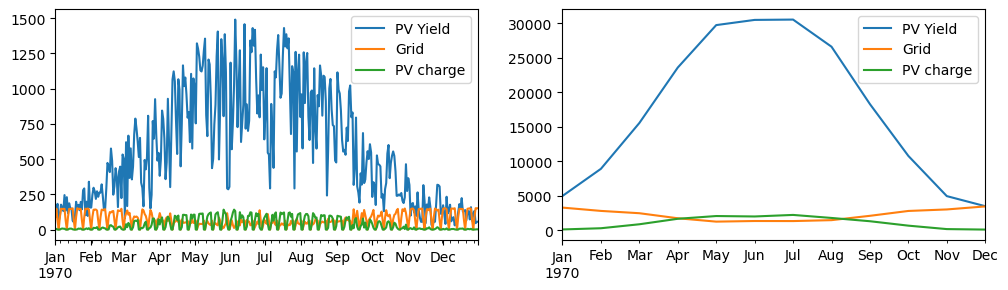

In [257]:
fig, ax = plt.subplots(1,2, figsize=(12,3))
year.drop("Fleet SOC", axis=1).resample("D").sum().plot(ax=ax[0])
year.drop("Fleet SOC", axis=1).resample("M").sum().plot(ax=ax[1])

As can be seen, the PV is being used, but even with a Truck going in the Night, it is not really used that well. It is even worse, when using a regular daytime Truck.
Let's change that and add a battery: for this, we change the simulate function to also include a battery. This also means thinking about the energy dispatch logic: The PV can either go to the battery or the truck, or both, but in which order?

1. PV > Truck
1. PV > Battery
1. PV > Grid
1. Battery > Truck
1. Grid > Truck

This means that the PV source can be split up into different parts, and so can the truck charge (coming from PV, battery or the Grid). Before, we had just two flows (PV>Truck, Grid>Truck), but now we have 5 potential flows that we need to track and calculate in that order. also note that these flows are in kWh/h, whereas the SOC of the truck and the battery is in kWh.


<AxesSubplot: >

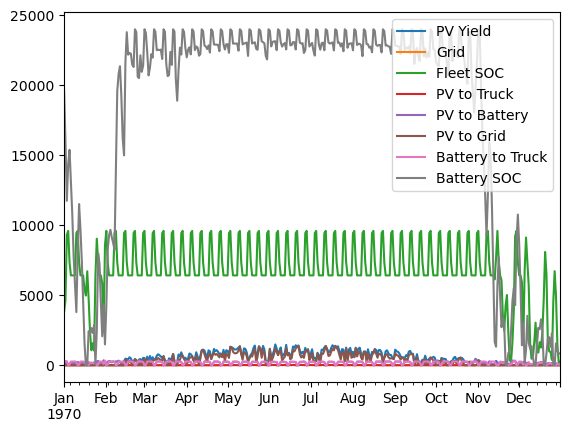

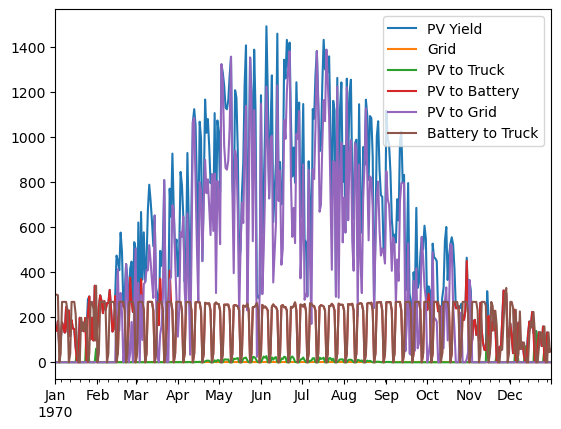

In [260]:
from Model import Etruck, Battery
def simulate(
        start_day = 0, 
        hours=8760, 
        schedule = "workday",
        pv_kWp = 200,
#new
        battery = Battery()):
    
    truck.schedule = schedule
    start_hour = start_day * 24
    stop_hour = start_hour + hours
    pv_raw = pv_kWp*np.genfromtxt("D:\Maria\data\PV_1kWp.csv")/1000 # -> Wh > kWh/h
    pv = pv_raw[start_hour:stop_hour]
    energy_balance = pd.DataFrame()
    energy_balance.index = np.arange(start=0, stop=8760, dtype="datetime64[h]")[start_hour:stop_hour]

    current_kWh = np.zeros(hours)
    current_kWh[0] = truck.current_kWh
# new
    battery_SOC_kWh = np.zeros(hours)


    gridcharge_kWh = np.zeros(hours)       #Grid > truck
    pvcharge_kWh = np.zeros(hours)         #PV > Truck
    battery_to_truck_kWh = np.zeros(hours) #battery > Truck

# new
    pv_to_battery_kWh = np.zeros(hours)
    pv_to_grid_kWh = np.zeros(hours)


    for h in range(hours):
        i = energy_balance.index[h]
        hd = i.hour
        wd = i.weekday()
        

# first  dispatch 
        dispatchable_PV = pv[h]
        if truck.status(hd, wd) == "onsite":
            pvcharge_kWh[h] = truck.charge(dispatchable_PV)
            dispatchable_PV -= pvcharge_kWh[h]
        
        pv_to_battery_kWh[h] = battery.charge(dispatchable_PV)
        pv_to_grid_kWh[h] = dispatchable_PV - pv_to_battery_kWh[h]

        # the first step is to add the 
        #if offsite: lower SoC by average km driven
        if truck.status(hd, wd) == "offsite":
            truck.discharge(truck.avg_km_per_h*truck.consumption)
        #if onsite: if not fully charged, charge and calc SoC
        else:
# new 
            battery_to_truck_kWh[h] = truck.charge(battery.max_discharge)
            battery.discharge(battery_to_truck_kWh[h])
            battery_SOC_kWh[h] -= battery_to_truck_kWh[h]
# and this can have additional logic        
            #gridcharge_kWh[h] = truck.charge(battery_SOC_kWh[h])

        current_kWh[h] = truck.current_kWh
        battery_SOC_kWh[h] = battery.current_kWh
    
    energy_balance["PV Yield"] = pv
    energy_balance["Grid"] = gridcharge_kWh
    energy_balance["Fleet SOC"] = current_kWh
    energy_balance["PV to Truck"] = pvcharge_kWh
    energy_balance["PV to Battery"] = pv_to_battery_kWh
    energy_balance["PV to Grid"] = pv_to_grid_kWh
    energy_balance["Battery to Truck"] = battery_to_truck_kWh
    energy_balance["Battery SOC"] = battery_SOC_kWh

    return energy_balance

ebs = simulate()
ebs.resample("D").sum().plot()
ebs.drop(["Battery SOC", "Fleet SOC"], axis=1).resample("D").sum().plot()

Now this is all well and good, but it gets really difficult to interpret the SOCs and the energy flows in the same diagram. lets split them up into two different dataframes: The existing "energy_balance" should cover all the hourly energy flows between the system components, and a new "states" should collect the states of the components themselves, namely the state of charge. We should then also return both as the result of the function and plot them side-by-side


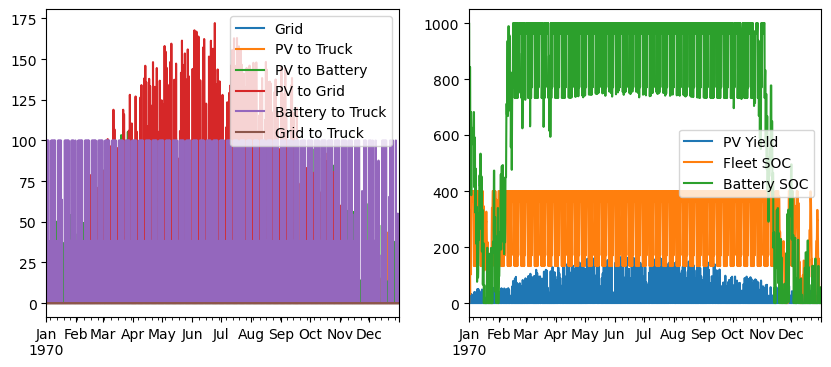

In [261]:

def simulate(
        start_day = 0, 
        hours=8760, 
        schedule="workday",
        pv_kWp = 200,
        battery = Battery()
        ):
    
    truck.schedule = schedule
    start_hour = start_day * 24
    stop_hour = start_hour + hours
    pv_raw = pv_kWp*np.genfromtxt("D:\Maria\data\PV_1kWp.csv")/1000 # -> Wh > kWh/h
    pv = pv_raw[start_hour:stop_hour]
    energy_balance = pd.DataFrame()
    energy_balance.index = np.arange(start=0, stop=8760, dtype="datetime64[h]")[start_hour:stop_hour]
# new
    states = pd.DataFrame()
    states.index = np.arange(start=0, stop=8760, dtype="datetime64[h]")[start_hour:stop_hour]

    current_kWh = np.zeros(hours)
    current_kWh[0] = truck.current_kWh
    battery_SOC_kWh = np.zeros(hours)


    gridcharge_kWh = np.zeros(hours)    #Grid > truck
    pvcharge_kWh = np.zeros(hours)      #PV > Truck
    battery_to_truck_kWh = np.zeros(hours) # battery > Truck
    pv_to_battery_kWh = np.zeros(hours)
    pv_to_grid_kWh = np.zeros(hours)


    for h in range(hours):
        i = energy_balance.index[h]
        hd = i.hour
        wd = i.weekday()
        

# first  dispatch 
        dispatchable_PV = pv[h]
        if truck.status(hd, wd) == "onsite":
            pvcharge_kWh[h] = truck.charge(dispatchable_PV)
            dispatchable_PV -= pvcharge_kWh[h]
        
        pv_to_battery_kWh[h] = battery.charge(dispatchable_PV)
        pv_to_grid_kWh[h] = dispatchable_PV - pv_to_battery_kWh[h]

        # the first step is to add the 
        #if offsite: lower SoC by average km driven
        if truck.status(hd, wd) == "offsite":
            truck.discharge(truck.avg_km_per_h*truck.consumption)
        #if onsite: if not fully charged, charge and calc SoC
        else:
            battery_to_truck_kWh[h] = truck.charge(battery.max_discharge)
            battery.discharge(battery_to_truck_kWh[h])
            battery_SOC_kWh[h] -= battery_to_truck_kWh[h]
# and this can have additional logic        
            #gridcharge_kWh[h] = truck.charge(battery_SOC_kWh[h])

        current_kWh[h] = truck.current_kWh
        battery_SOC_kWh[h] = battery.current_kWh
    
# change
    states["PV Yield"] = pv
    states["Fleet SOC"] = current_kWh
    states["Battery SOC"] = battery_SOC_kWh
    energy_balance["Grid"] = gridcharge_kWh
    energy_balance["PV to Truck"] = pvcharge_kWh
    energy_balance["PV to Battery"] = pv_to_battery_kWh
    energy_balance["PV to Grid"] = pv_to_grid_kWh
    energy_balance["Battery to Truck"] = battery_to_truck_kWh
    energy_balance["Grid to Truck"] = gridcharge_kWh

    return (energy_balance, states)


def visualize(result_dfs: tuple, resample=(None, None)):
    states, energy_balance = result_dfs
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    if resample[0] is not None:
        states = states.resample(resample[0]).sum()
    if resample[1] is not None:
        energy_balance = energy_balance.resample(resample[1]).sum()
    states.plot(ax=ax[0])
    energy_balance.plot(ax=ax[1])

visualize(simulate())

Now, as we can see here, the 1000 kWh Battery struggles to keep up with an annual PV yield and truck electricity demand of  .... what exactly again?
 

In [262]:
energy_balance, state = simulate()
truck_demand = energy_balance[["PV to Truck", "Battery to Truck", "Grid to Truck"]].sum()
print(f"Annual Truck charge: \n{truck_demand}")
print("Annual PV Yield:", state["PV Yield"].sum())

Annual Truck charge: 
PV to Truck          2803.800625
Battery to Truck    63025.588125
Grid to Truck           0.000000
dtype: float64
Annual PV Yield: 207669.4275


So lets increase the battery and while we're at it, let's also include grid charging, if the SOC of the truck is below a given threshold parameter of the simulation, lets say 20% (bonus points for making the threshold equal to the average daily energy demand of the truck). let's also make sure that the battery starts empty

Energy Flows: 
Grid                   250.096250
PV to Truck           2803.800625
PV to Battery        63025.588125
PV to Grid          141840.038750
Battery to Truck     62969.612500
Grid to Truck          250.096250
dtype: float64
PV Yield: 207669.4275


<AxesSubplot: >

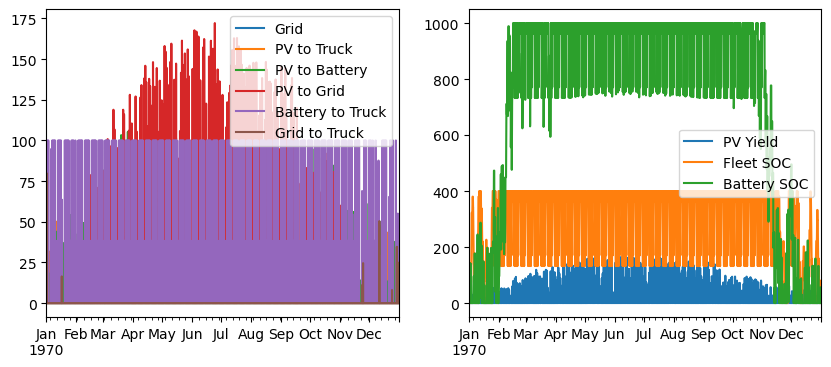

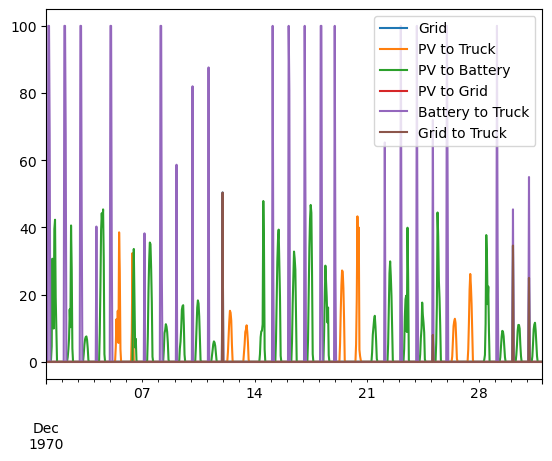

In [264]:
def simulate(
        start_day = 0, 
        hours=8760, 
        schedule="workday",
        pv_kWp = 200,
#new
        battery_kWh = 2000,
        grid_threshold = 0.2
        ):
    
    truck.schedule = schedule
    start_hour = start_day * 24
    stop_hour = start_hour + hours
    pv_raw = pv_kWp*np.genfromtxt("D:\Maria\data\PV_1kWp.csv")/1000 # -> Wh > kWh/h
    pv = pv_raw[start_hour:stop_hour]

#new 
    
    battery = Battery()
    battery.capacity_kWh = battery_kWh
    battery.current_kWh = 0

    energy_balance = pd.DataFrame()
    energy_balance.index = np.arange(start=0, stop=8760, dtype="datetime64[h]")[start_hour:stop_hour]
    states = pd.DataFrame()
    states.index = np.arange(start=0, stop=8760, dtype="datetime64[h]")[start_hour:stop_hour]

    current_kWh = np.zeros(hours)
    current_kWh[0] = truck.current_kWh
    battery_SOC_kWh = np.zeros(hours)


    gridcharge_kWh = np.zeros(hours)    #Grid > truck
    pvcharge_kWh = np.zeros(hours)      #PV > Truck
    battery_to_truck_kWh = np.zeros(hours) # battery > Truck
    pv_to_battery_kWh = np.zeros(hours)
    pv_to_grid_kWh = np.zeros(hours)


    for h in range(hours):
        i = energy_balance.index[h]
        hd = i.hour
        wd = i.weekday()
        

#first  dispatch 
        dispatchable_PV = pv[h]
        if truck.status(hd, wd) == "onsite":
            pvcharge_kWh[h] = truck.charge(dispatchable_PV)
            dispatchable_PV -= pvcharge_kWh[h]
        
        pv_to_battery_kWh[h] = battery.charge(dispatchable_PV)
        pv_to_grid_kWh[h] = dispatchable_PV - pv_to_battery_kWh[h]

        # the first step is to add the 
        #if offsite: lower SoC by average km driven
        if truck.status(hd, wd) == "offsite":
            truck.discharge(truck.avg_km_per_h*truck.consumption)
        #if onsite: if not fully charged, charge and calc SoC
        else:
            battery_to_truck_kWh[h] = truck.charge(battery.max_discharge)
            battery.discharge(battery_to_truck_kWh[h])
            battery_SOC_kWh[h] -= battery_to_truck_kWh[h]
# and this can have additional logic     
            if truck.SoC < grid_threshold:
                difference_kWh = (grid_threshold - truck.SoC)*truck.capacity_kWh
                gridcharge_kWh[h] = truck.charge(difference_kWh)

        current_kWh[h] = truck.current_kWh
        battery_SOC_kWh[h] = battery.current_kWh
    
    states["PV Yield"] = pv
    states["Fleet SOC"] = current_kWh
    states["Battery SOC"] = battery_SOC_kWh
    energy_balance["Grid"] = gridcharge_kWh
    energy_balance["PV to Truck"] = pvcharge_kWh
    energy_balance["PV to Battery"] = pv_to_battery_kWh
    energy_balance["PV to Grid"] = pv_to_grid_kWh
    energy_balance["Battery to Truck"] = battery_to_truck_kWh
    energy_balance["Grid to Truck"] = gridcharge_kWh
    print(f"Energy Flows: \n{energy_balance.sum()}")
    print("PV Yield:", state["PV Yield"].sum())
    return (energy_balance, states)


def visualize(result_dfs: tuple, resample=(None, None)):
    states, energy_balance = result_dfs
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    if resample[0] is not None:
        states = states.resample(resample[0]).sum()
    if resample[1] is not None:
        energy_balance = energy_balance.resample(resample[1]).sum()
    states.plot(ax=ax[0])
    energy_balance.plot(ax=ax[1])

energy_balance, state = simulate(battery_kWh=1000)
visualize((energy_balance, state))
energy_balance[energy_balance.index.month==12].plot()

now its time to think about how we can expand the model to include multiple different trucks:


Energy Flows: 
Grid                 8419.0
PV to Truck          9687.0
PV to Battery       81606.0
PV to Grid          12542.0
Battery to Truck    81578.0
Grid to Truck        8419.0
dtype: float64
PV Yield: 207669.0


<AxesSubplot: >

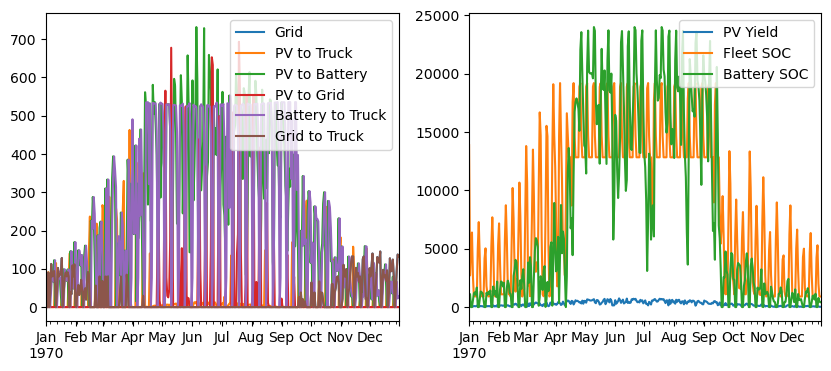

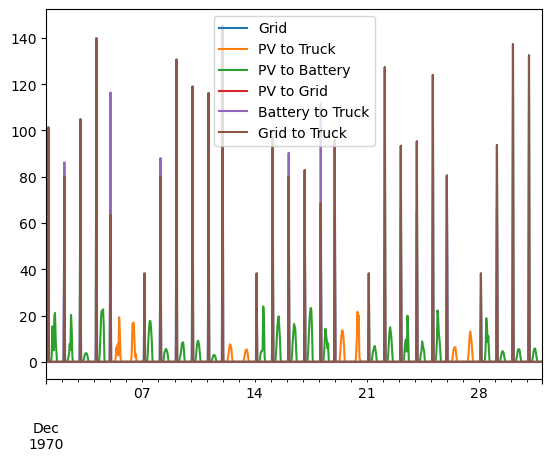

In [269]:
def simulate(
        start_day = 0, 
        hours=8760, 
        trucks = [m.Etruck(schedule="workday")],
        pv_kWp = 200,
        battery_kWh = 2000,
        grid_threshold = 0.2
        ):
    
    start_hour = start_day * 24
    stop_hour = start_hour + hours
    pv_raw = pv_kWp*np.genfromtxt("D:\Maria\data\PV_1kWp.csv")/1000 # -> Wh > kWh/h
    pv = pv_raw[start_hour:stop_hour]
    
    battery = Battery()
    battery.capacity_kWh = battery_kWh
    battery.current_kWh = 0

    energy_balance = pd.DataFrame()
    energy_balance.index = np.arange(start=0, stop=8760, dtype="datetime64[h]")[start_hour:stop_hour]
    states = pd.DataFrame()
    states.index = np.arange(start=0, stop=8760, dtype="datetime64[h]")[start_hour:stop_hour]

    current_kWh = np.zeros(hours)
    current_kWh[0] = sum(truck.current_kWh for truck in trucks)
    battery_SOC_kWh = np.zeros(hours)

    gridcharge_kWh = np.zeros(hours)    #Grid > truck
    pvcharge_kWh = np.zeros(hours)      #PV > Truck
    battery_to_truck_kWh = np.zeros(hours) # battery > Truck
    pv_to_battery_kWh = np.zeros(hours)
    pv_to_grid_kWh = np.zeros(hours)
    driven_kWh = np.zeros(hours)


    for h in range(hours):
        i = energy_balance.index[h]
        hd = i.hour
        wd = i.weekday()
    
#first  dispatch 
        dispatchable_PV = pv[h]
        for truck in trucks:
            if truck.status(hd, wd) == "onsite":
                pv_used_in_truck = truck.charge(dispatchable_PV)
                pvcharge_kWh[h] += pv_used_in_truck
                dispatchable_PV -= pv_used_in_truck

                batt_used_in_truck = truck.charge(battery.max_discharge)
                battery.discharge(batt_used_in_truck)
                battery_SOC_kWh[h] -= batt_used_in_truck
                battery_to_truck_kWh[h] += batt_used_in_truck
    # and this can have additional logic     
                if truck.SoC < grid_threshold:
                    difference_kWh = (grid_threshold - truck.SoC)*truck.capacity_kWh
                    gridcharge_kWh[h] += truck.charge(difference_kWh)
            
            #if offsite: lower SoC by average km driven
            if truck.status(hd, wd) == "offsite":
    # record the energy for driving
                driven_kWh[h] += truck.discharge(truck.avg_km_per_h*truck.consumption)
                
            current_kWh[h] += truck.current_kWh
        
        pv_to_battery_kWh[h] = battery.charge(dispatchable_PV)
        pv_to_grid_kWh[h] = dispatchable_PV - pv_to_battery_kWh[h]
        battery_SOC_kWh[h] = battery.current_kWh
    
    states["PV Yield"] = pv
    states["Fleet SOC"] = current_kWh
    states["Battery SOC"] = battery_SOC_kWh
    energy_balance["Grid"] = gridcharge_kWh
    energy_balance["PV to Truck"] = pvcharge_kWh
    energy_balance["PV to Battery"] = pv_to_battery_kWh
    energy_balance["PV to Grid"] = pv_to_grid_kWh
    energy_balance["Battery to Truck"] = battery_to_truck_kWh
    energy_balance["Grid to Truck"] = gridcharge_kWh
    print(f"Energy Flows: \n{energy_balance.sum().round()}")
    print("PV Yield:", state["PV Yield"].sum().round())
    return (energy_balance, states)


def visualize(result_dfs: tuple, resample=(None, None)):
    states, energy_balance = result_dfs
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    if resample[0] is not None:
        states = states.resample(resample[0]).sum()
    if resample[1] is not None:
        energy_balance = energy_balance.resample(resample[1]).sum()
    states.plot(ax=ax[0])
    energy_balance.plot(ax=ax[1])

trucks = [m.Etruck() for i in range(1)]
trucks+= [m.Etruck() for i in range(1)]
energy_balance, state = simulate(trucks=trucks, battery_kWh=1000, pv_kWp=100)
visualize((energy_balance, state), resample=("D","D"))
energy_balance[energy_balance.index.month==12].plot()

Now, let's expand the introspection of the model to get a better understanding of what's going in! What are the KPIs for this model? At the end, we want to optimize the model for either *cost* or *CO2 savings*, or both. So we need to introduce appropriate data first. How? This is a good point to think about the output of our model in general: Right now, we have two core dataframes of hourly data (*energy_balance* and *states*) that we return and then process, visualize etc., but we also parameters such as the PV system size, the battery size, etc that we need for the assessment. 

Energy Flows: 
Grid                12214.0
PV to Truck         26908.0
PV to Battery       51472.0
PV to Grid          25455.0
Battery to Truck    51472.0
Grid to Truck       12214.0
dtype: float64
PV Yield: 103835.0
results['system cost']=400000.0
results["operating cost"]=1048.0
results["emissions"]=3297.9


<AxesSubplot: >

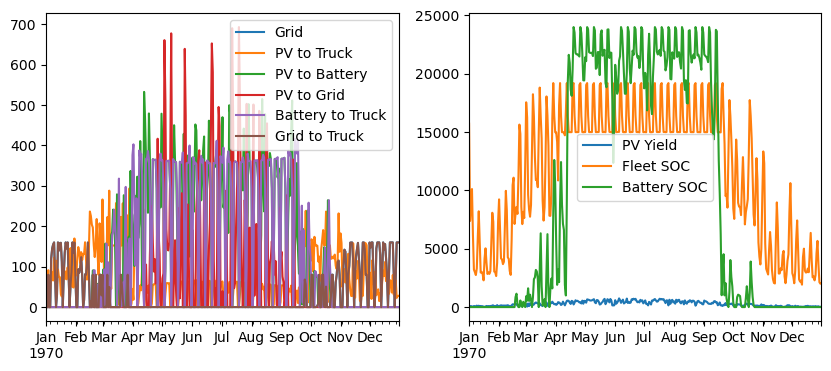

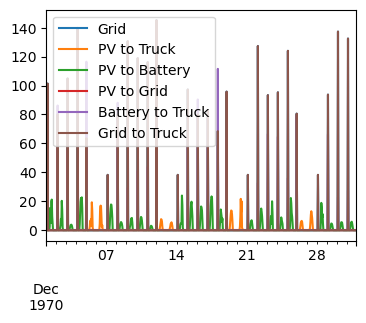

In [270]:
def simulate(
        start_day = 0, 
        hours=8760, 
        trucks = [m.Etruck(schedule="workday")],
        pv_kWp = 200,
        battery_kWh = 2000,
        grid_threshold = 0.2,
#new
        grid_tarif_cpkWh = 0.19,
        grid_feedin_cpkWh = 0.05,
        pv_cost_pkWp = 1000,
        battery_cost_pkWh = 300,
        co2_intensity = 0.270 #kg/kWh grid
        ):
    
    start_hour = start_day * 24
    stop_hour = start_hour + hours
    pv_raw = pv_kWp*np.genfromtxt("D:\Maria\data\PV_1kWp.csv")/1000  # -> Wh > kWh/h
    pv = pv_raw[start_hour:stop_hour]
    
    battery = Battery()
    battery.capacity_kWh = battery_kWh
    battery.current_kWh = 0

    energy_balance = pd.DataFrame()
    energy_balance.index = np.arange(start=0, stop=8760, dtype="datetime64[h]")[start_hour:stop_hour]
    states = pd.DataFrame()
    states.index = np.arange(start=0, stop=8760, dtype="datetime64[h]")[start_hour:stop_hour]

    current_kWh = np.zeros(hours)
    current_kWh[0] = sum(truck.current_kWh for truck in trucks)
    battery_SOC_kWh = np.zeros(hours)

    gridcharge_kWh = np.zeros(hours)    #Grid > truck
    pvcharge_kWh = np.zeros(hours)      #PV > Truck
    battery_to_truck_kWh = np.zeros(hours) # battery > Truck
    pv_to_battery_kWh = np.zeros(hours)
    pv_to_grid_kWh = np.zeros(hours)
    driven_kWh = np.zeros(hours)


    for h in range(hours):
        i = energy_balance.index[h]
        hd = i.hour
        wd = i.weekday()
    
#first  dispatch 
        dispatchable_PV = pv[h]
        for truck in trucks:
            if truck.status(hd, wd) == "onsite":
                pv_used_in_truck = truck.charge(dispatchable_PV)
                pvcharge_kWh[h] += pv_used_in_truck
                dispatchable_PV -= pv_used_in_truck

                batt_used_in_truck = truck.charge(battery.max_discharge)
                battery.discharge(batt_used_in_truck)
                battery_SOC_kWh[h] -= batt_used_in_truck
                battery_to_truck_kWh[h] += batt_used_in_truck
    # and this can have additional logic     
                if truck.SoC < grid_threshold:
                    difference_kWh = (grid_threshold - truck.SoC)*truck.capacity_kWh
                    gridcharge_kWh[h] += truck.charge(difference_kWh)
            
            #if offsite: lower SoC by average km driven
            if truck.status(hd, wd) == "offsite":
    # record the energy for driving
                driven_kWh[h] += truck.discharge(truck.avg_km_per_h*truck.consumption)
                
            current_kWh[h] += truck.current_kWh
        
        pv_to_battery_kWh[h] = battery.charge(dispatchable_PV)
        pv_to_grid_kWh[h] = dispatchable_PV - pv_to_battery_kWh[h]
        battery_SOC_kWh[h] = battery.current_kWh
    
    states["PV Yield"] = pv
    states["Fleet SOC"] = current_kWh
    states["Battery SOC"] = battery_SOC_kWh
    energy_balance["Grid"] = gridcharge_kWh
    energy_balance["PV to Truck"] = pvcharge_kWh
    energy_balance["PV to Battery"] = pv_to_battery_kWh
    energy_balance["PV to Grid"] = pv_to_grid_kWh
    energy_balance["Battery to Truck"] = battery_to_truck_kWh
    energy_balance["Grid to Truck"] = gridcharge_kWh
# new
    results = {
        "energy balance": energy_balance,
        "states": states,
        "system cost": pv_cost_pkWp*pv_kWp + battery_cost_pkWh*battery_kWh,
        "operating cost": gridcharge_kWh.sum()*grid_tarif_cpkWh - pv_to_grid_kWh.sum()*grid_feedin_cpkWh,
        "emissions": gridcharge_kWh.sum()*co2_intensity
    }
    
    print(f"Energy Flows: \n{energy_balance.sum().round()}")
    print("PV Yield:", state["PV Yield"].sum().round())
    print(f"{results['system cost']=:.1f}")
    print(f'{results["operating cost"]=:.1f}')
    print(f'{results["emissions"]=:.1f}')

    return results


def visualize(result_dfs: tuple, resample=(None, None)):
    states, energy_balance = result_dfs
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    if resample[0] is not None:
        states = states.resample(resample[0]).sum()
    if resample[1] is not None:
        energy_balance = energy_balance.resample(resample[1]).sum()
    states.plot(ax=ax[0])
    energy_balance.plot(ax=ax[1])

trucks = [m.Etruck() for i in range(1)]
trucks+= [m.Etruck("worknight") for i in range(1)]
#new
results = simulate(trucks=trucks, battery_kWh=1000, pv_kWp=100)
visualize((results["energy balance"], results["states"]), resample=("D","D"))
energy_balance[energy_balance.index.month==12].plot(figsize=(4,3))

This works, but is not very effective. say we want to assess the same model, just with different prices. We would need to rerun the whole simulation, which is actually not neccessary. it might be better to encapsulate the results in a different object, a "Results" class that stores all the outputs as parameters. The Results class could then also provide all methods for introspection: price calculation, plotting, printing, etc.

Lets move everything that is not directly part of the simulation and just postprocessing into a new Results class:

Energy Flows: 
Grid                12214.0
PV to Truck         26908.0
PV to Battery       51472.0
PV to Grid          25455.0
Battery to Truck    51472.0
Grid to Truck       12214.0
Driven             -91350.0
dtype: float64
PV Yield:, 103835 kWh/a
self.system_cost=400_000.0€
self.operating_cost*1000=1_047_977.6€/a
self.emissions=3297.9kg/a

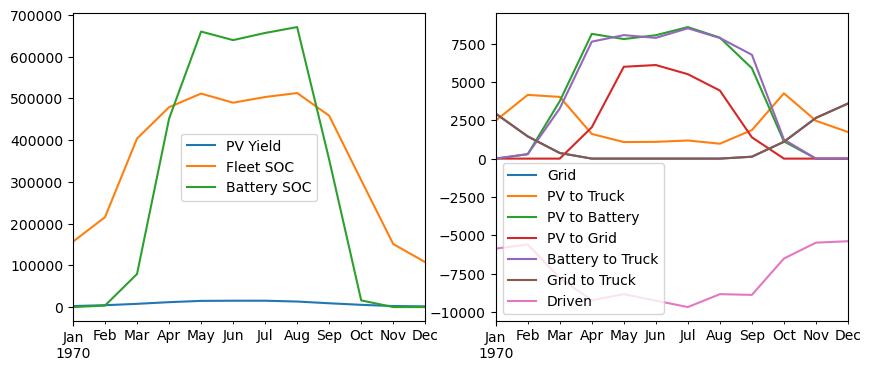

In [3]:
class Result:
    energy_balance: pd.DataFrame
    states: pd.DataFrame
    pv_kWp: float
    pv_cost_pkWp = 1000
    battery_kWh: float
    battery_cost_pkWh= 300
    grid_tarif_cpkWh = 0.19
    grid_feedin_cpkWh = 0.05
    co2_intensity = 0.270 #kg/kWh grid
    trucks: list

    @property
    def system_cost(self):
        return self.pv_cost_pkWp*self.pv_kWp + self.battery_cost_pkWh*self.battery_kWh
    
    @property
    def operating_cost(self):
        return self.energy_balance["Grid to Truck"].sum()*self.grid_tarif_cpkWh - self.energy_balance["PV to Grid"].sum()*self.grid_feedin_cpkWh
    
    @property
    def emissions(self):
        return self.energy_balance["Grid to Truck"].sum()*self.co2_intensity
    
    @property
    def self_consumption(self):
        return 1-(self.energy_balance["PV to Grid"].sum()/self.states["PV Yield"].sum())
    
    @property
    def fleet_capacity(self):
        return sum(truck.capacity_kWh for truck in self.trucks)
    
    def visualize(self, resample=(None, None)):
        states, energy_balance = self.states, self.energy_balance
        fig, ax = plt.subplots(1,2, figsize=(10,4))
        if resample[0] is not None:
            states = states.resample(resample[0]).sum()
        if resample[1] is not None:
            energy_balance = energy_balance.resample(resample[1]).sum()
        states.plot(ax=ax[0])
        energy_balance.plot(ax=ax[1])

    def __repr__(self):
        string = f"Energy Flows: \n{self.energy_balance.sum().round()}"
        string += f'\nPV Yield:, {self.states["PV Yield"].sum().round():.0f} kWh/a'
        string += f"\n{self.system_cost=:_.1f}€"
        string += f'\n{self.operating_cost*1000=:_.1f}€/a'
        string += f'\n{self.emissions=:.1f}kg/a'
        return string
    
def simulate(
        start_day = 0, 
        hours=8760, 
        trucks = [m.Etruck(schedule="workday")],
        pv_kWp = 200,
        battery_kWh = 2000,
        grid_threshold = 0.2,
        ):
    
    start_hour = start_day * 24
    stop_hour = start_hour + hours
    pv_raw = pv_kWp*np.genfromtxt("D:\Maria\data\PV_1kWp.csv")/1000  # -> Wh > kWh/h
    pv = pv_raw[start_hour:stop_hour]
    
    battery = m.Battery()
    battery.capacity_kWh = battery_kWh
    battery.current_kWh = 0

    energy_balance = pd.DataFrame()
    energy_balance.index = np.arange(start=0, stop=8760, dtype="datetime64[h]")[start_hour:stop_hour]
    states = pd.DataFrame()
    states.index = np.arange(start=0, stop=8760, dtype="datetime64[h]")[start_hour:stop_hour]

    current_kWh = np.zeros(hours)
    current_kWh[0] = sum(truck.current_kWh for truck in trucks)
    battery_SOC_kWh = np.zeros(hours)

    gridcharge_kWh = np.zeros(hours)    #Grid > truck
    pvcharge_kWh = np.zeros(hours)      #PV > Truck
    battery_to_truck_kWh = np.zeros(hours) # battery > Truck
    pv_to_battery_kWh = np.zeros(hours)
    pv_to_grid_kWh = np.zeros(hours)
    driven_kWh = np.zeros(hours)

    for h in range(hours):
        i = energy_balance.index[h]
        hd = i.hour
        wd = i.weekday()

        dispatchable_PV = pv[h]
        for truck in trucks:
            if truck.status(hd, wd) == "onsite":
                pv_used_in_truck = truck.charge(dispatchable_PV)
                pvcharge_kWh[h] += pv_used_in_truck
                dispatchable_PV -= pv_used_in_truck

                batt_used_in_truck = truck.charge(battery.max_discharge)
                battery.discharge(batt_used_in_truck)
                battery_SOC_kWh[h] -= batt_used_in_truck
                battery_to_truck_kWh[h] += batt_used_in_truck
                
                if truck.SoC < grid_threshold:
                    difference_kWh = (grid_threshold - truck.SoC)*truck.capacity_kWh
                    gridcharge_kWh[h] += truck.charge(difference_kWh)
            
            if truck.status(hd, wd) == "offsite":
                driven_kWh[h] += truck.discharge(truck.avg_km_per_h*truck.consumption)
                
            current_kWh[h] += truck.current_kWh
        
        pv_to_battery_kWh[h] = battery.charge(dispatchable_PV)
        pv_to_grid_kWh[h] = dispatchable_PV - pv_to_battery_kWh[h]
        battery_SOC_kWh[h] = battery.current_kWh
    
    states["PV Yield"] = pv
    states["Fleet SOC"] = current_kWh
    states["Battery SOC"] = battery_SOC_kWh
    energy_balance["Grid"] = gridcharge_kWh
    energy_balance["PV to Truck"] = pvcharge_kWh
    energy_balance["PV to Battery"] = pv_to_battery_kWh
    energy_balance["PV to Grid"] = pv_to_grid_kWh
    energy_balance["Battery to Truck"] = battery_to_truck_kWh
    energy_balance["Grid to Truck"] = gridcharge_kWh
    energy_balance["Driven"] = -driven_kWh

    results = Result()
# new
    results.energy_balance = energy_balance
    results.states = states
    results.battery_kWh = battery_kWh
    results.pv_kWp = pv_kWp
    results.trucks = trucks

    return results


trucks = [m.Etruck() for i in range(1)]
trucks+= [m.Etruck("worknight") for i in range(1)]

results = simulate(start_day=0, hours=8760, trucks=trucks, battery_kWh=1000, pv_kWp=100)
results.visualize(("M", "M"))
results

With this, we should be able to do a number of important checks of model validity. Expand the Results class to assess the following:
- Do the total Battery Charge and Discharge match?
- How much energy is being discharged from the trucks due to driving and does it match the sum of energy input from PV, Battery and the Grid?

Total Battery Charge: 51471.65 kWh
Total Battery Discharge: 51471.65 kWh
>>>> ___Battery Charge = Battery Discharge___ <<<<

Total Energy Input: 90593.84 kWh
Total Energy Output from Trucks: 91349.60 kWh
>>>> ___Energy Input < Energy Output___ <<<<


Energy Flows: 
Grid                12214.0
PV to Truck         26908.0
PV to Battery       51472.0
PV to Grid          25455.0
Battery to Truck    51472.0
Grid to Truck       12214.0
Driven             -91350.0
dtype: float64
PV Yield:, 103835 kWh/a
self.system_cost=400_000.0€
self.operating_cost*1000=1_047_977.6€/a
self.emissions=3297.9kg/a

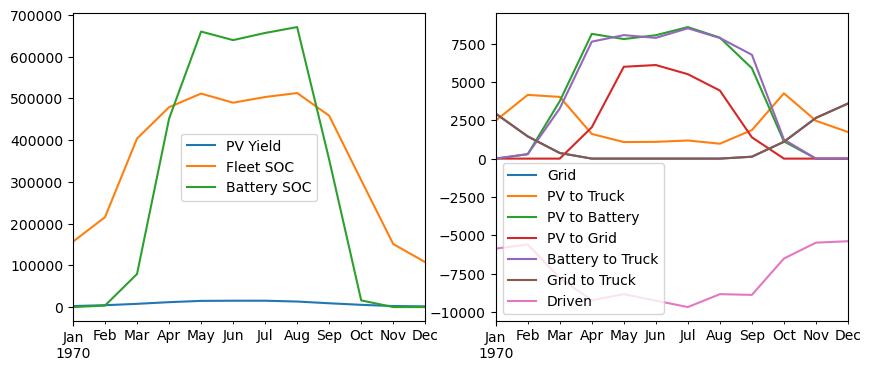

In [5]:
import numpy as np
import pandas as pd
import Model as m
import matplotlib.pyplot as plt

# extension start marked by "#> extension:" , extension end by "#>>>>> until here"
class Result:
    energy_balance: pd.DataFrame
    states: pd.DataFrame
    pv_kWp: float
    pv_cost_pkWp = 1000
    battery_kWh: float
    battery_cost_pkWh= 300
    grid_tarif_cpkWh = 0.19
    grid_feedin_cpkWh = 0.05
    co2_intensity = 0.270 #kg/kWh grid
    trucks: list

    @property
    def system_cost(self):
        return self.pv_cost_pkWp*self.pv_kWp + self.battery_cost_pkWh*self.battery_kWh
    
    @property
    def operating_cost(self):
        return self.energy_balance["Grid to Truck"].sum()*self.grid_tarif_cpkWh - self.energy_balance["PV to Grid"].sum()*self.grid_feedin_cpkWh
    
    @property
    def emissions(self):
        return self.energy_balance["Grid to Truck"].sum()*self.co2_intensity
    
    @property
    def self_consumption(self):
        return 1-(self.energy_balance["PV to Grid"].sum()/self.states["PV Yield"].sum())
    
    @property
    def fleet_capacity(self):
        return sum(truck.capacity_kWh for truck in self.trucks)
    
    #> extension:
    @property
    def total_battery_charge(self):
        return self.energy_balance["PV to Battery"].sum()

    @property
    def total_battery_discharge(self):
        return self.energy_balance["Battery to Truck"].sum()

    @property
    def total_energy_input(self):
        return self.energy_balance[["PV to Truck", "Battery to Truck", "Grid to Truck"]].sum().sum()

    @property
    def total_energy_output(self):
        return self.energy_balance["Driven"].sum()

    def check_battery_balance(self):
        total_charge = self.total_battery_charge
        total_discharge = self.total_battery_discharge
        print(f"Total Battery Charge: {total_charge:.2f} kWh")
        print(f"Total Battery Discharge: {total_discharge:.2f} kWh")
        if total_charge == total_discharge:
            print(">>>> ___Battery Charge = Battery Discharge___ <<<<\n")
        elif total_charge > total_discharge:
            print(">>>> ___Battery charge > Battery Discharge___ <<<<\n")
        else:
            print(">>>> ___Battery charge < Battery Discharge___ <<<<\n")

    def check_energy_balance(self):
        total_input = self.total_energy_input
        total_output = self.total_energy_output
        if total_output < 0:
            total_output = abs(total_output)
        print(f"Total Energy Input: {total_input:.2f} kWh")
        print(f"Total Energy Output from Trucks: {total_output:.2f} kWh")
        if total_input == total_output:
            print(">>>> ___Energy Input = Energy Output___ <<<<")
        elif total_input > total_output:
            print(">>>> ___Energy Input > Energy Output___ <<<<")
        else:
            print(">>>> ___Energy Input < Energy Output___ <<<<")
    #>>>>> until here
    
    def visualize(self, resample=(None, None)):
        states, energy_balance = self.states, self.energy_balance
        fig, ax = plt.subplots(1,2, figsize=(10,4))
        if resample[0] is not None:
            states = states.resample(resample[0]).sum()
        if resample[1] is not None:
            energy_balance = energy_balance.resample(resample[1]).sum()
        states.plot(ax=ax[0])
        energy_balance.plot(ax=ax[1])
        
    #> extension:    
        self.check_battery_balance()
        self.check_energy_balance()
    #>>>>> until here

    def __repr__(self):
        string = f"Energy Flows: \n{self.energy_balance.sum().round()}"
        string += f'\nPV Yield:, {self.states["PV Yield"].sum().round():.0f} kWh/a'
        string += f"\n{self.system_cost=:_.1f}€"
        string += f'\n{self.operating_cost*1000=:_.1f}€/a'
        string += f'\n{self.emissions=:.1f}kg/a'
        return string
    
def simulate(
        start_day = 0, 
        hours=8760, 
        trucks = [m.Etruck(schedule="workday")],
        pv_kWp = 200,
        battery_kWh = 2000,
        grid_threshold = 0.2,
        ):
    
    start_hour = start_day * 24
    stop_hour = start_hour + hours
    pv_raw = pv_kWp*np.genfromtxt("D:\Maria\data\PV_1kWp.csv")/1000  # -> Wh > kWh/h
    pv = pv_raw[start_hour:stop_hour]
    
    battery = m.Battery()
    battery.capacity_kWh = battery_kWh
    battery.current_kWh = 0

    energy_balance = pd.DataFrame()
    energy_balance.index = np.arange(start=0, stop=8760, dtype="datetime64[h]")[start_hour:stop_hour]
    states = pd.DataFrame()
    states.index = np.arange(start=0, stop=8760, dtype="datetime64[h]")[start_hour:stop_hour]

    current_kWh = np.zeros(hours)
    current_kWh[0] = sum(truck.current_kWh for truck in trucks)
    battery_SOC_kWh = np.zeros(hours)

    gridcharge_kWh = np.zeros(hours)    #Grid > truck
    pvcharge_kWh = np.zeros(hours)      #PV > Truck
    battery_to_truck_kWh = np.zeros(hours) # battery > Truck
    pv_to_battery_kWh = np.zeros(hours)
    pv_to_grid_kWh = np.zeros(hours)
    driven_kWh = np.zeros(hours)

    for h in range(hours):
        i = energy_balance.index[h]
        hd = i.hour
        wd = i.weekday()

        dispatchable_PV = pv[h]
        for truck in trucks:
            if truck.status(hd, wd) == "onsite":
                pv_used_in_truck = truck.charge(dispatchable_PV)
                pvcharge_kWh[h] += pv_used_in_truck
                dispatchable_PV -= pv_used_in_truck

                batt_used_in_truck = truck.charge(battery.max_discharge)
                battery.discharge(batt_used_in_truck)
                battery_SOC_kWh[h] -= batt_used_in_truck
                battery_to_truck_kWh[h] += batt_used_in_truck
                
                if truck.SoC < grid_threshold:
                    difference_kWh = (grid_threshold - truck.SoC)*truck.capacity_kWh
                    gridcharge_kWh[h] += truck.charge(difference_kWh)
            
            if truck.status(hd, wd) == "offsite":
                driven_kWh[h] += truck.discharge(truck.avg_km_per_h*truck.consumption)
                
            current_kWh[h] += truck.current_kWh
        
        pv_to_battery_kWh[h] = battery.charge(dispatchable_PV)
        pv_to_grid_kWh[h] = dispatchable_PV - pv_to_battery_kWh[h]
        battery_SOC_kWh[h] = battery.current_kWh
    
    states["PV Yield"] = pv
    states["Fleet SOC"] = current_kWh
    states["Battery SOC"] = battery_SOC_kWh
    energy_balance["Grid"] = gridcharge_kWh
    energy_balance["PV to Truck"] = pvcharge_kWh
    energy_balance["PV to Battery"] = pv_to_battery_kWh
    energy_balance["PV to Grid"] = pv_to_grid_kWh
    energy_balance["Battery to Truck"] = battery_to_truck_kWh
    energy_balance["Grid to Truck"] = gridcharge_kWh
    energy_balance["Driven"] = -driven_kWh

    results = Result()

    results.energy_balance = energy_balance
    results.states = states
    results.battery_kWh = battery_kWh
    results.pv_kWp = pv_kWp
    results.trucks = trucks

    return results


trucks = [m.Etruck() for i in range(1)]
trucks+= [m.Etruck("worknight") for i in range(1)]

results = simulate(start_day=0, hours=8760, trucks=trucks, battery_kWh=1000, pv_kWp=100)
results.visualize(("M", "M"))
results

In [52]:
# Total energy input to truck:
print(round(results.energy_balance[["PV to Truck", "Battery to Truck", "Grid to Truck"]].sum().sum(), 2), "kWh")


90593.84 kWh
